In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def generate_cluster(x=0, y=0, size = 100, r = 10):
    x_new = np.random.uniform(x-r, x+r, size = (size,))
    y_new = np.random.uniform(y-r, y+r, size = (size,))
    #points = np.dstack((x_new, y_new))
    
    return (x_new, y_new)

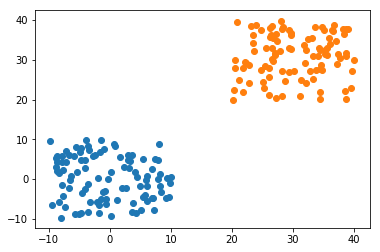

In [89]:
x1,y1 = generate_cluster()
plt.scatter(x1,y1)
x2,y2 = generate_cluster(30,30)
plt.scatter(x2,y2)
plt.show()

In [96]:
Feature1 = np.concatenate((x1,x2))
Feature2 = np.concatenate((y1,y2))

X = np.dstack((Feature1, Feature2)) #Gives 3-D Array, we need 2-D

size = 100
X = X.reshape(size*2, 2)

In [143]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100
min_distance_change = 10000

In [144]:
K = 2

In [145]:
Centroids=np.array([]).reshape(n,0) 

prev_centroids=np.array([]).reshape(n,0) 

In [146]:
for i in range(K):
    random_centroid=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[random_centroid]]
    
prev_centroids = Centroids

In [147]:
Output={}

In [148]:
min_distance_change

10000

In [149]:
while min_distance_change >= 0.01:
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    Output=Y
    
    min_distance_change = 0
    for k in range(K):
        min_distance_change += np.sum((prev_centroids[:,k] -Centroids[:,k])**2)
    
    prev_centroids = Centroids
    

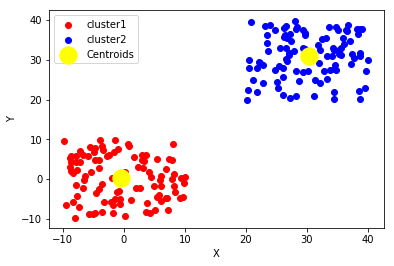

In [150]:
color=['red','blue','green','black','pink']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()